In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

In [2]:
url = "C:/Users/juan_/Downloads/FuelConsumptionCo2.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


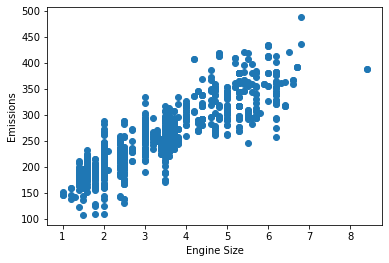

In [6]:
plt.scatter(df['ENGINESIZE'],df['CO2EMISSIONS'])
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [8]:
X = df[['ENGINESIZE']]
y = df[['CO2EMISSIONS']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

,ENGINESIZE
56,3.0
301,6.4
992,2.5
893,4.8
54,4.0
...,...
847,1.6
715,2.5
905,4.8
235,2.4


In [10]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures(degree=2)
poly_X_train = poly.fit_transform(X_train)

In [43]:
lr2 = linear_model.LinearRegression()
lr2.fit(poly_X_train, y_train)

LinearRegression()

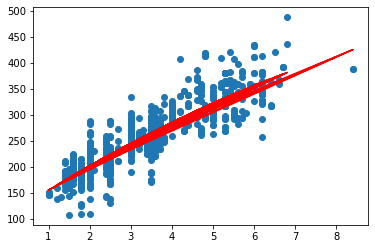

In [44]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr2.predict(poly_X_train), color ='red')

In [49]:
print(X_train,
poly_X_train)
    

      ENGINESIZE
56           3.0
301          6.4
992          2.5
893          4.8
54           4.0
...          ...
847          1.6
715          2.5
905          4.8
235          2.4
1061         3.2

[853 rows x 1 columns] [[ 1.    3.    9.  ]
 [ 1.    6.4  40.96]
 [ 1.    2.5   6.25]
 ...
 [ 1.    4.8  23.04]
 [ 1.    2.4   5.76]
 [ 1.    3.2  10.24]]
